In [1]:
!pip install dominate

In [2]:
!pip install visdom


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408195 sha256=8fcf13c38c87389364ca0044598b4a9bf1ff0abb0a622a49971a690fad45fea5
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


In [3]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 20.53 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [4]:
%cd pytorch-CycleGAN-and-pix2pix

/content/pytorch-CycleGAN-and-pix2pix


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Training

In [ ]:
!python /content/pytorch-CycleGAN-and-pix2pix/train.py --dataroot /content/drive/MyDrive --name image_restoration_smudges --model pix2pix --direction AtoB --dataset_mode aligned --gpu_ids 0 --display_id -1 --checkpoints_dir /content/drive/MyDrive/checkpoints/ --continue_train --epoch_count 199

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: /content/drive/MyDrive/checkpoints/	[default: ./checkpoints]
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive        	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
            

# Testing

In [16]:
!python /content/pytorch-CycleGAN-and-pix2pix/test.py --gpu_ids -1 --dataroot /content/drive/MyDrive/ --name image_restoration_smudges --model pix2pix --direction AtoB --dataset_mode aligned   --results_dir /content/drive/MyDrive/results_smudged/ --checkpoints_dir /content/drive/MyDrive/checkpoints_smudged/ --phase test --num_test 238


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/drive/MyDrive/checkpoints_smudged/	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/       	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: -1                            	[default: 0]
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
     

# Inference

In [27]:
!python /content/pytorch-CycleGAN-and-pix2pix/test.py --dataroot /content/data/test --name image_restoration_smudges --model pix2pix --gpu_ids -1 --checkpoints_dir /content/drive/MyDrive/checkpoints_smudged/ --results_dir /content/drive/MyDrive/results_smudged_inference --phase test --eval --batch_size 1 --dataset_mode single --netG unet_256 --no_flip


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/drive/MyDrive/checkpoints_smudged/	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/data/test            	[default: None]
             dataset_mode: single                        	[default: aligned]
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: True                          	[default: False]
                  gpu_ids: -1                            	[default: 0]
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False           

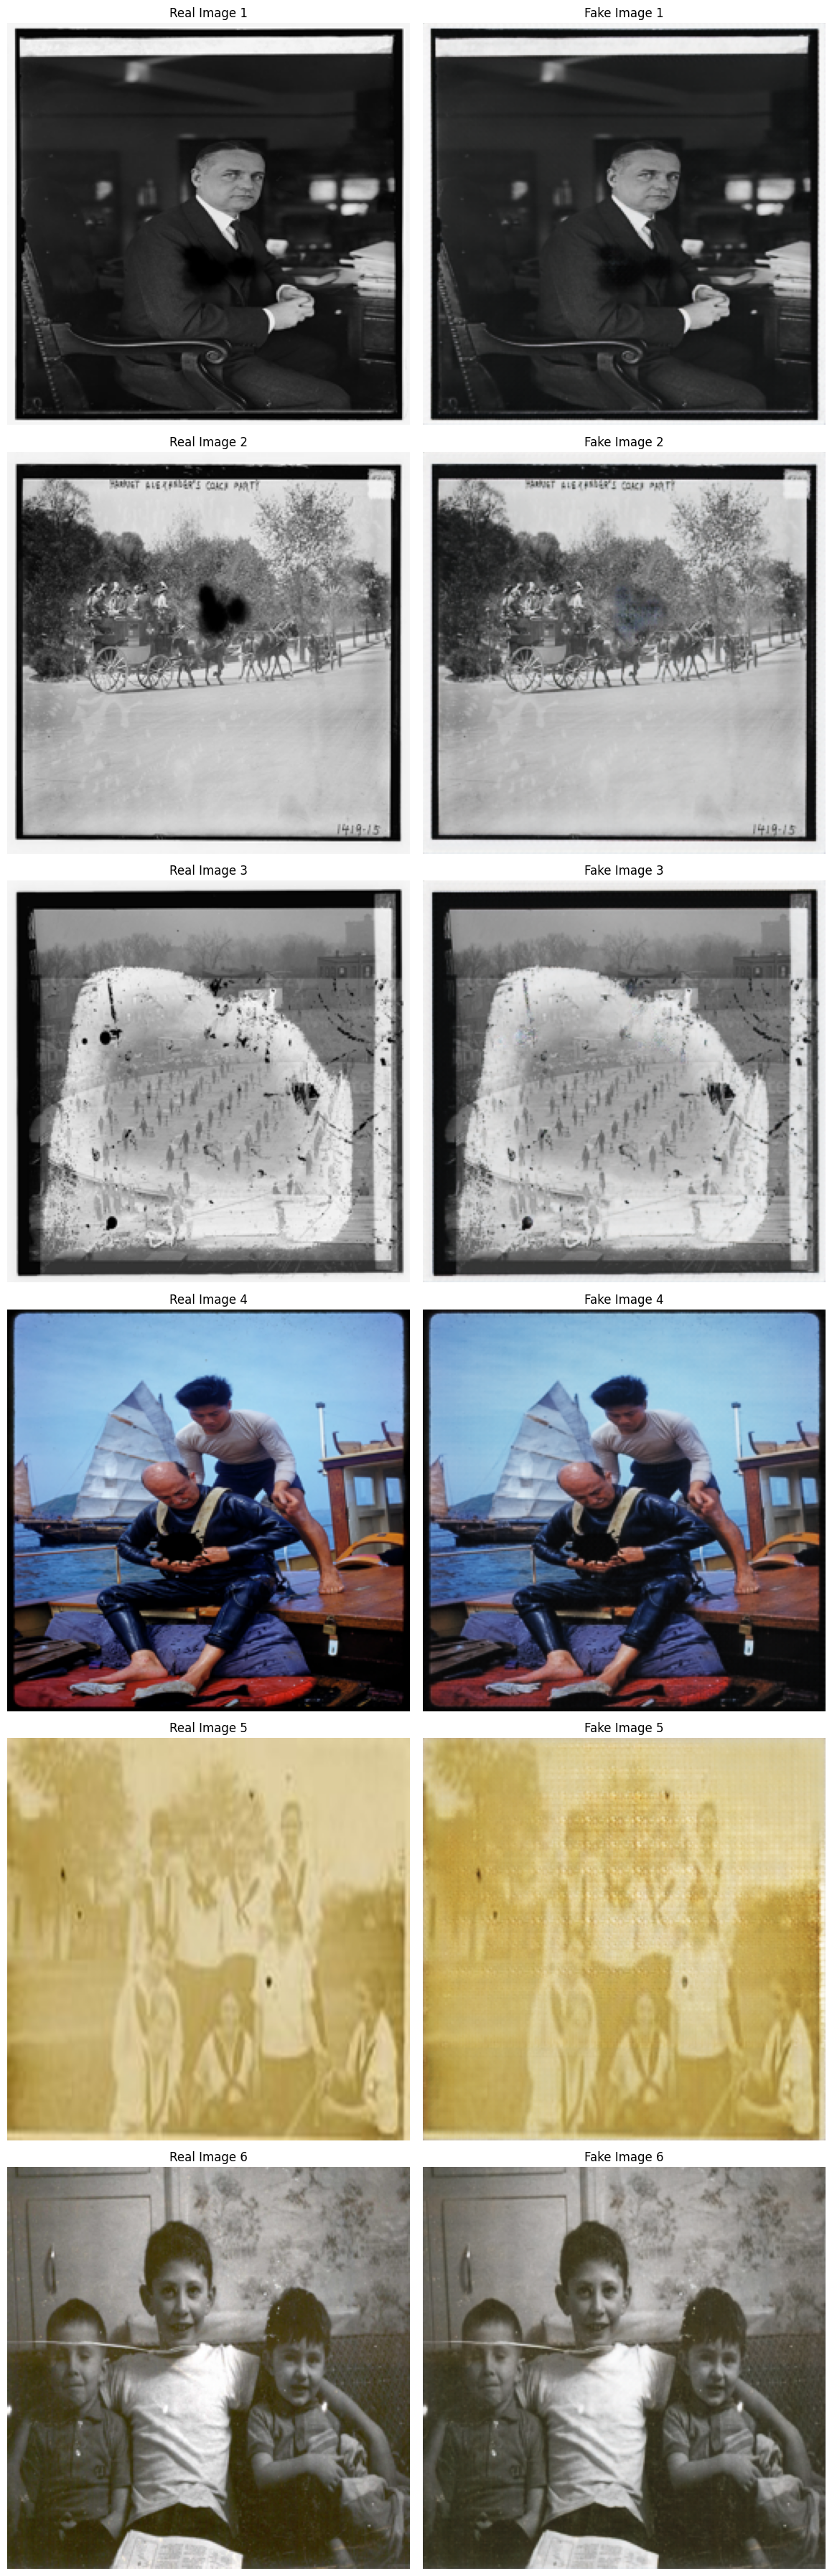

In [28]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Paths to your images
fake_folder_path = "/content/drive/MyDrive/results_smudged_inference/image_restoration_smudges/test_latest/images"
real_folder_path = "/content/drive/MyDrive/results_smudged_inference/image_restoration_smudges/test_latest/images"

# Get lists of image files
fake_images = sorted([f for f in os.listdir(fake_folder_path) if f.endswith('fake_B.png')])
real_images = sorted([f for f in os.listdir(real_folder_path) if f.endswith('real_A.png')])

# Ensure both folders have the same number of images and at least one image exists
if not fake_images or not real_images:
    print("No images found in one or both folders. Check the file paths and patterns.")
    # You might want to exit or handle this case differently
else:
    assert len(fake_images) == len(real_images), "Mismatch in number of images"

    # Set up the figure for displaying images
    num_images = len(fake_images)
    fig, axes = plt.subplots(num_images, 2, figsize=(12, 6 * num_images))  # Adjust figure size based on number of images

    # Loop through each image pair
    for i in range(num_images):
        # Load images
        fake_image = Image.open(os.path.join(fake_folder_path, fake_images[i])).convert('RGB')
        real_image = Image.open(os.path.join(real_folder_path, real_images[i])).convert('RGB')

        # Display real image
        axes[i, 0].imshow(real_image)
        axes[i, 0].axis('off')  # Hide axes
        axes[i, 0].set_title(f'Real Image {i + 1}')

        # Display fake image
        axes[i, 1].imshow(fake_image)
        axes[i, 1].axis('off')  # Hide axes
        axes[i, 1].set_title(f'Fake Image {i + 1}')

    # Adjust layout
    plt.tight_layout()
    # Show the images
    plt.show()

# Evaluation

###PSNR (Peak Signal-to-Noise Ratio)

In [17]:
import os
import cv2
import numpy as np

# Function to calculate PSNR
def calculate_psnr(real_image, fake_image):
    mse = np.mean((real_image - fake_image) ** 2)
    if mse == 0:
        return 100  # Perfect match
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

# Path to the directory containing images
image_folder = "/content/drive/MyDrive/results_smudged/image_restoration_smudges/test_latest/images"

# Lists to store PSNR values
psnr_values = []

# Loop over the images in the folder
for filename in os.listdir(image_folder):
    if filename.endswith("_real_B.png"):
        # Get the corresponding fake image name
        fake_filename = filename.replace("_real_B.png", "_fake_B.png")

        real_image_path = os.path.join(image_folder, filename)
        fake_image_path = os.path.join(image_folder, fake_filename)

        # Check if the corresponding fake image exists
        if os.path.exists(fake_image_path):
            # Read the real and fake images
            real_image = cv2.imread(real_image_path, cv2.IMREAD_COLOR)
            fake_image = cv2.imread(fake_image_path, cv2.IMREAD_COLOR)

            # Ensure both images are the same size
            if real_image.shape == fake_image.shape:
                # Calculate PSNR
                psnr = calculate_psnr(real_image, fake_image)
                psnr_values.append(psnr)
            else:
                print(f"Image size mismatch between {filename} and {fake_filename}")

# Calculate the average PSNR
if psnr_values:
    average_psnr = np.mean(psnr_values)
    print(f"Average PSNR for all images: {average_psnr}")
else:
    print("No valid image pairs found.")


Average PSNR for all images: 35.53084849429375


###SSIM (Structural Similarity Index)

In [18]:
import os
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(img1, img2):
    # Convert images to grayscale for SSIM calculation (optional)
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    return ssim(img1_gray, img2_gray)

def evaluate_ssim(folder_path):
    total_ssim = 0.0
    num_images = 0

    # Loop through the folder to get image pairs
    for filename in os.listdir(folder_path):
        if 'fake_B' in filename:  # Look for the fake_B image
            fake_image_path = os.path.join(folder_path, filename)
            real_image_path = fake_image_path.replace('fake_B', 'real_B')  # Find the corresponding real_B image

            if os.path.exists(real_image_path):
                # Load the images
                fake_img = cv2.imread(fake_image_path)
                real_img = cv2.imread(real_image_path)

                # Compute SSIM for the image pair
                score = calculate_ssim(real_img, fake_img)
                total_ssim += score
                num_images += 1

    if num_images == 0:
        print("No valid image pairs found.")
        return 0

    # Calculate the average SSIM
    average_ssim = total_ssim / num_images
    print(f'Average SSIM: {average_ssim}')
    return average_ssim

# Set the folder path where the images are stored
folder_path = "/content/drive/MyDrive/results_smudged/image_restoration_smudges/test_latest/images"
evaluate_ssim(folder_path)


Average SSIM: 0.9078206564270932


0.9078206564270932